# Capstone: Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import project utils
import sys
sys.path.append('../src')

import data_utils
import graph_utils

## The Data

In [4]:
# Global settings
random_state = 42   # Consistent random_state

In [5]:
# Convert the raw SFPD data into a cleansed data file - only to be used when refreshing from new data

file_raw_data = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
file_clean_data = '../data/incidents_clean.csv'

# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER
# data_utils.generate_clean_csv(file_raw_data, file_clean_data, debug=True)

OUTPUT SAVED FROM LAST RUN:
```
Start Time: 09/12/24 08:19:24

Reading file: ../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv ... Done: 887,173 rows, 35 columns
... Formatting column names ... Done
... Creating timeseries columns: datetime and date ... 
...... Number of rows where the datetime conversion failed: 0
...... Number of rows where the date conversion failed: 0
...... Timespan: 2018-01-01 00:00:00 - 2024-09-08 19:30:00
... Done
... Setting index to datetime ... Done

Current Time: 09/12/24 08:21:24

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                                           887173 non-null  int64         
 8   incident_number                                       887173 non-null  int64         
 9   cad_number                                            689019 non-null  float64       
 10  report_type_code                                      887173 non-null  object        
 11  report_type_description                               887173 non-null  object        
 12  filed_online                                          175483 non-null  object        
 13  incident_code                                         887173 non-null  int64         
 14  incident_category                                     886295 non-null  object        
 15  incident_subcategory                                  886295 non-null  object        
 16  incident_description                                  887173 non-null  object        
 17  resolution                                            887173 non-null  object        
 18  intersection                                          838341 non-null  object        
 19  cnn                                                   838341 non-null  float64       
 20  police_district                                       887173 non-null  object        
 21  analysis_neighborhood                                 838173 non-null  object        
 22  supervisor_district                                   837885 non-null  float64       
 23  supervisor_district_2012                              838198 non-null  float64       
 24  latitude                                              838341 non-null  float64       
 25  longitude                                             838341 non-null  float64       
 26  point                                                 838341 non-null  object        
 27  neighborhoods                                         821671 non-null  float64       
 28  esncag_-_boundary_file                                9413 non-null    float64       
 29  central_market/tenderloin_boundary_polygon_-_updated  117048 non-null  float64       
 30  civic_center_harm_reduction_project_boundary          114781 non-null  float64       
 31  hsoc_zones_as_of_2018-06-05                           185157 non-null  float64       
 32  invest_in_neighborhoods_(iin)_areas                   0 non-null       float64       
 33  current_supervisor_districts                          838198 non-null  float64       
 34  current_police_districts                              837437 non-null  float64       
 35  date                                                  887173 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(5), object(16)
memory usage: 250.4+ MB
... Writing file: ../data/incidents_clean.csv (887173, 36) ... Done
Done

End Time: 09/12/24 08:22:04
```

In [7]:
# Uncomment to generate the sample files

# data_utils.generate_sample_files(file_clean_data, random_state=random_state)

OUTPUT SAVED FROM LAST RUN:
```
Start Time: 09/12/24 08:22:04

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Writing 10% sample file: ../data/incidents_clean_10_pct.csv (88717, 37) ... Done
... Writing 25% sample file: ../data/incidents_clean_25_pct.csv (221793, 37) ... Done
... Writing 50% sample file: ../data/incidents_clean_50_pct.csv (443586, 37) ... Done
... Writing 75% sample file: ../data/incidents_clean_75_pct.csv (665380, 37) ... Done
End Time: 09/12/24 08:23:32
```

In [9]:
# Which dataset to work from?
sample_file_size_pct = 10
match(sample_file_size_pct):
    case 100:
        sample_file = file_clean_data
    case 25 | 50 | 75:
        file_prefix = file_clean_data.replace('.csv', '')
        sample_file = f'{file_prefix}_{sample_file_size_pct}_pct.csv'
    case _:
        sample_file = '../data/incidents_clean_10_pct.csv'

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean_10_pct.csv


In [10]:
raw_data, clean_data = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean_10_pct.csv ... Done: 88,717 rows, 38 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
... Dropping unwanted columns ... 
... Done
Done


In [11]:
raw_data.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_datetime', 'row_id',
       'incident_id', 'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'neighborhoods', 'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [12]:
clean_data.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [13]:
clean_data.head(2)

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_type_code,report_type_description,filed_online,incident_code,incident_category,...,intersection,cnn,police_district,analysis_neighborhood,supervisor_district,supervisor_district_2012,neighborhoods,current_supervisor_districts,current_police_districts,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-10 07:59:00,2022/02/10 07:59:00 AM,2022/02/10,07:59,2022,Thursday,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,...,SAN BENITO WAY \ OCEAN AVE,22771000.0,Ingleside,West of Twin Peaks,7.0,7.0,67.0,8.0,10.0,2022-02-10
2022-11-17 23:30:00,2022/11/17 11:30:00 PM,2022/11/17,23:30,2022,Thursday,II,Initial,NaN,75000,Missing Person,...,SYCAMORE ST \ VALENCIA ST,24172000.0,Mission,Mission,9.0,8.0,53.0,5.0,3.0,2022-11-17


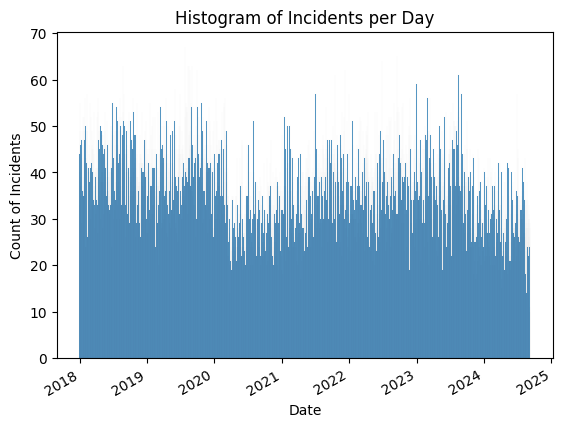

In [14]:
sns.histplot(data=clean_data, x='date', discrete=True)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.title('Histogram of Incidents per Day')
plt.show()

In [15]:
clean_data.resolution.value_counts(normalize=True)

resolution
Open or Active          0.803645
Cite or Arrest Adult    0.188656
Unfounded               0.005005
Exceptional Adult       0.002694
Name: proportion, dtype: float64

In [16]:
temp_copy = clean_data.copy()

temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [17]:
# try:
#     # Get rid of columns that were introduced as part of creating the sample files
#     sampling_unwanted_cols = ['Unnamed: 0', 'junk']
#     for col in sampling_unwanted_cols:
#         temp_copy.drop(columns=col, inplace=True)

# except:
#     print(repr(sys.exception()))

# finally:
#     drop_cols = ['report_datetime', # redundant
#                  'row_id',
#                  'incident_id', 'incident_number',
#                  'cad_number',
#                  'latitude', 'longitude', 'point',  
#                  'esncag_-_boundary_file',
#                  'central_market/tenderloin_boundary_polygon_-_updated', 
#                  'civic_center_harm_reduction_project_boundary',
#                  'hsoc_zones_as_of_2018-06-05',
#                  'invest_in_neighborhoods_(iin)_areas'
#                 ]
#     temp_copy = temp_copy.drop(columns=drop_cols) 

In [18]:
temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [19]:
temp = temp_copy.head(1000)

In [20]:
temp.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [21]:
# graph_utils.graph_features(temp, 13, 2, figsize=(10, 15))

In [22]:
# feature_df = temp[['incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week']]
# graph_features(feature_df, 3, 2)

In [23]:
temp_copy.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [24]:
temp_copy.incident_description.head(5)

datetime
2022-02-10 07:59:00                Vehicle, Recovered, Auto
2022-11-17 23:30:00                            Found Person
2023-12-23 22:50:00                         Found  Property
2018-09-05 13:20:00    Methamphetamine, Possession For Sale
2022-01-22 10:28:00                Vehicle, Recovered, Auto
Name: incident_description, dtype: object

In [25]:
temp_copy.shape

(88717, 23)

In [26]:
temp_copy.incident_description.value_counts()

incident_description
Theft, From Locked Vehicle, >$950            10659
Malicious Mischief, Vandalism to Property     2894
Battery                                       2693
Lost Property                                 2667
Vehicle, Stolen, Auto                         2650
                                             ...  
Homicide, Drive-by                               1
Assault, Mayhem, W/ Gun                          1
Throwing Injurious Substance on Highway          1
Loitering near ATM                               1
Assault, Att. Mayhem, W/ Force                   1
Name: count, Length: 657, dtype: int64

In [27]:
temp_copy.incident_category.value_counts()

incident_category
Larceny Theft                                   26472
Other Miscellaneous                              6039
Malicious Mischief                               5935
Assault                                          5512
Non-Criminal                                     5207
Motor Vehicle Theft                              5009
Burglary                                         4929
Recovered Vehicle                                3534
Fraud                                            2857
Warrant                                          2700
Lost Property                                    2667
Drug Offense                                     2256
Robbery                                          1945
Missing Person                                   1887
Suspicious Occ                                   1811
Disorderly Conduct                               1523
Offences Against The Family And Children         1201
Miscellaneous Investigation                      1032
Traffic Vi